In [252]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Linear regression

In [253]:
df = pd.DataFrame({
    'years_of_education': [5, 7, 8, 9 ,10 ,11 ,12 ,13, 5, 7, 8, 9, 10, 11, 12 ,13],
    'gender':['woman','woman','woman','woman','woman','woman','woman','woman', 'man','man','man','man','man','man','man','man'],
    'money':[150, 175, 180, 195, 225, 230, 235, 245, 100, 120, 130, 150 ,170 ,180 ,190 ,200]}
)

df

,years_of_education,gender,money
0,5,woman,150
1,7,woman,175
2,8,woman,180
3,9,woman,195
4,10,woman,225
5,11,woman,230
6,12,woman,235
7,13,woman,245
8,5,man,100
9,7,man,120


In [256]:
X = df[['years_of_education']]
y = df['money']

In [257]:
y.mean()

179.6875

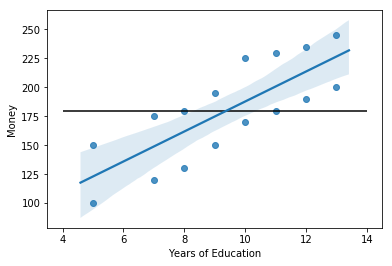

In [258]:
sns.regplot(X, y)
plt.xlabel('Years of Education')
plt.ylabel('Money')

plt.hlines(179.6875,4,14)

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
model = LinearRegression()

In [261]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
model.score(X, y)

0.6214376693867453

In [263]:
from sklearn.metrics import mean_squared_error

In [264]:
np.sqrt(mean_squared_error(y, model.predict(X)))

25.23910563010343

In [265]:
model.predict(X.loc[0:0, ['years_of_education']])

array([123.02631579])

In [266]:
model.coef_

# pra cada ano que você aumenta em years_of_education, você aumenta em ~13 reais o seu money

array([12.95112782])

In [305]:
X = df[['years_of_education','gender']]
y = df['money']

In [306]:
X

,years_of_education,gender
0,5,woman
1,7,woman
2,8,woman
3,9,woman
4,10,woman
5,11,woman
6,12,woman
7,13,woman
8,5,man
9,7,man


In [307]:
# model.fit will throw an error
model.fit(X, y)

ValueError: could not convert string to float: 'woman'

In [308]:
X = pd.get_dummies(X, drop_first=True)

In [309]:
X

,years_of_education,gender_woman
0,5,1
1,7,1
2,8,1
3,9,1
4,10,1
5,11,1
6,12,1
7,13,1
8,5,0
9,7,0


In [310]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
X

,years_of_education,gender_woman
0,5,1
1,7,1
2,8,1
3,9,1
4,10,1
5,11,1
6,12,1
7,13,1
8,5,0
9,7,0


In [312]:
model.score(X, y)

0.9836337114040397

In [313]:
model.intercept_

33.58317669172931

In [314]:
model.coef_

array([12.95112782, 49.375     ])

Interpretation of the coefficient of a dummy variable.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

$\beta_0 = 33.6$

$\beta_1 = 12.95$ 

$x_1 =$ years_of_education (so for each year of education, you increase 12.95 in money)

$\beta_2 = 49.4$ 

$x_2 = $ gender_woman - that is, 1 if is woman, 0 if not.

The equation:
    
$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times \text{gender_woman} $

for the case of <span style='color:blue'> <b>women</b> </span>: 

$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times \text{1} $ <br>
$ \text{money} = 33.6 + 49.4 + 12.95 \times \text{years_of_education}  $

for the case of <span style='color:red'> <b>men</b> </span>:

$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times 0 $<br>
$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} $

So, the $\beta$ coefficient for dummy variables means that - fixing all other variables (that is, for the same level of education), women has an average of 49.4 intercept increase in money.

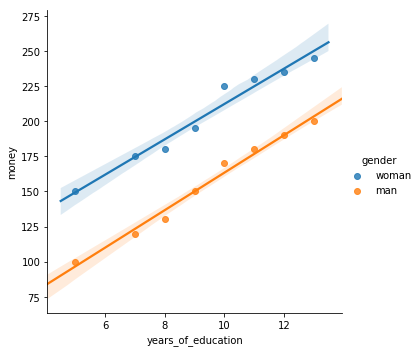

In [315]:
sns.lmplot('years_of_education','money', data=df, hue='gender')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# The central limit theorem

- given <b>ANY</b> distribution

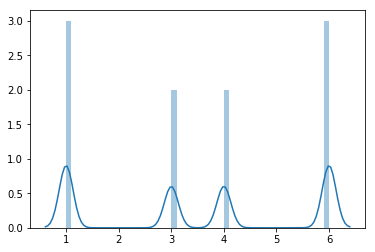

In [316]:
sns.distplot(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=1000000))

In [317]:
# that has ANY mean
np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=1000000).mean()

3.500179

In [318]:
# and a specific standard deviation
np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=1000000).std()

1.962334723511766

- take a sample from it and calculate its mean

In [326]:
np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=10))

3.2

- take a sample N times and calculate the mean N times

In [327]:
values = [np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=10)) for item in range(1000)]

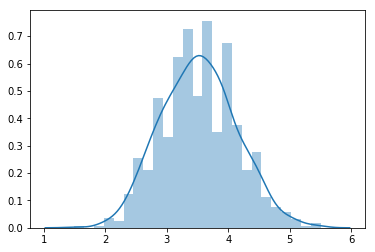

In [329]:
sns.distplot(values)

- now you have a new set of data
- this data will be normally distributed as long as you increase the number samples you take

Sample mean: 3.4883, Standard Error: 0.6207520519498908


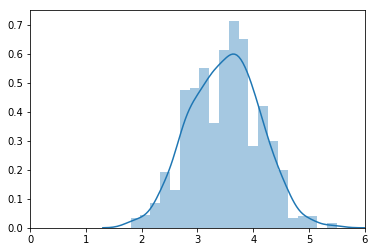

In [335]:
values = [np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=10)) for item in range(1000)]
sns.distplot(values)
plt.xlim([0, 6])

print(f'Sample mean: {np.mean(values)}, Standard Error: {np.std(values)}')

Standard Error of the sampling distribution will be:
    
$$ \sigma_{sample} = \frac{\sigma_{population}}{\sqrt{N}} $$

In [331]:
1.96 / np.sqrt(10)

0.6198064213930023

Sample mean: 3.49905, Standard Error: 0.4326391076867647


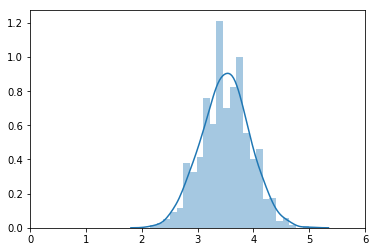

In [336]:
values = [np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=20)) for item in range(1000)]
sns.distplot(values)
plt.xlim([0, 6])

print(f'Sample mean: {np.mean(values)}, Standard Error: {np.std(values)}')

In [337]:
1.96 / np.sqrt(20)

0.43826932358995874

Sample mean: 3.5158, Standard Error: 0.35505136404626175


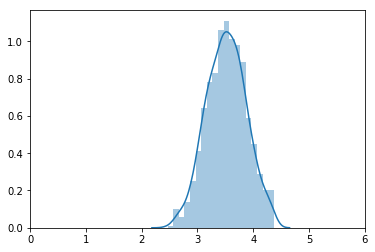

In [338]:
values = [np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=30)) for item in range(1000)]
sns.distplot(values)
plt.xlim([0, 6])

print(f'Sample mean: {np.mean(values)}, Standard Error: {np.std(values)}')

In [339]:
1.96 / np.sqrt(30)

0.3578454042367085

Sample mean: 3.49849, Standard Error: 0.1945503017216884


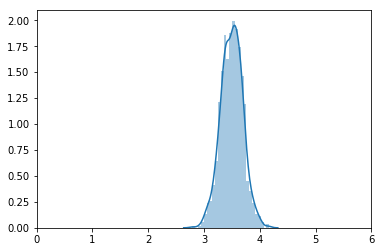

In [340]:
values = [np.mean(np.random.choice([1,2,3,4,5,6], p=[0.3,0,0.2,0.2, 0, 0.3], size=100)) for item in range(1000)]
sns.distplot(values)
plt.xlim([0, 6])

print(f'Sample mean: {np.mean(values)}, Standard Error: {np.std(values)}')

In [341]:
1.96 / np.sqrt(100)

0.196

# Confidence Intervals

## Suppose you want to estimate the height of men in Brazil.

### Mini-sample

Let's suppose I somehow know the standard deviation of men's height to be ~10cm. This means that men's height comes from a normal distribution with the following parameters:
$$N(\mu, 0.1)$$

You can't measure everyone in the population. Let's say we take 1 single sample. Me. I measure 1.75m. What can I say about this estimate?

Recalling from Gaussian Distribution features, we know that ~95% of the values lies within 2 standard deviations. We can safely say, then, that the average of men's height is 1.75m $\pm$ 0.2m with 95% confidence. That is, the average men's height lies within (1.55m, 195m) with 95% confidence.

### Not-so mini-sample

Now imagine you use the height of ~30 men. And you found that the average men's height is 1.72m

We know from the Central Limit Theorem that 

$$ \sigma_{sample} = \frac{\sigma_{population}}{\sqrt{N}} $$

And, as we saw from the Central limit theorem, we can say that this is also a normal distribution with $N(\mu, sigma_{sample})$. In this sense, we can safely say that the men's average we've found (1.72m) is within 2 standard deviations $\sigma_{sample} = 2\times\frac{0.1}{\sqrt{30}} \approx 0.036 $ with 95% confidence. So the confidence interval, in this sampling would be (1.683m, 1.756m)


In [344]:
1.72 + 0.036

1.756

## Z-Score Generalization

$$ \left( \bar{X} - Z_{\frac{\alpha}{2}} \frac{\sigma_{population}}{\sqrt{N}}, \bar{X} + Z_{\frac{\alpha}{2}} \frac{\sigma_{population}}{\sqrt{N}} \right) $$

- $\bar{X}$ is the mean of our sample
- $\sigma_{population}$ is the true standard deviation of our population 
- $N$ is the number of samples you took
- $\alpha$ is ($1 - \text{confidence level}$) (for example, for 95% confidence level, we have $\alpha = 0.05$)
- $Z_\frac{\alpha}{2}$ is the z-score. We'll see how they are calculated, but the most used one is the 95% confidence level (which corresponds to alpha = 0.05) $ \rightarrow Z_{0.025} = 1.96$


## In Python

In [345]:
from scipy.stats import norm

In [346]:
mean = 1.72
std_error = 0.1/np.sqrt(30)

### Method 1

Calculation of the z-score

In [347]:
# z-score generalization given the confidence interval
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [348]:
ci = (mean - norm.interval(0.95)[1] * std_error, mean + norm.interval(0.95)[1] * std_error)
ci

(1.6842161171256569, 1.755783882874343)

### Method 2

Specifying mean and standard error of the mean to `norm.interval` method

In [349]:
ci = norm.interval(0.95, loc=mean, scale=std_error)
ci

(1.6842161171256569, 1.755783882874343)